<a href="https://colab.research.google.com/github/AshaPothana/insurance-cost-prediction/blob/main/Business_Case_Insurance_Cost_Prediction_Asha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

**Block 1: Tableau Visualization Insights**

**Summary Statistics Dashboard:**

- **Health Condition Prevalence:** A high percentage of the population has chronic diseases or other health issues, indicating significant risk factors that need to be accounted for in pricing models.

- **Average Premium Trends:** The average premium trends upward with age and the presence of multiple health conditions, which is consistent with higher risk profiles.

**Premium Pricing Analysis Dashboard:**

- **Age and Premium Correlation:** Premiums increase significantly with age, highlighting the need for age-adjusted pricing models to ensure fairness.
- **Impact of Health Factors:** Specific health conditions, such as diabetes and chronic diseases, show a marked increase in premiums, suggesting these are critical factors in risk assessment.

**Correlation Heatmap:**

- **Strong Correlations Identified:** Significant correlations between premium prices and variables like age, weight, and number of major surgeries. These insights can direct more focused underwriting policies.

**Risk Factors Analysis Dashboard:**

- **Surgical Impact:** A clear pattern shows higher premiums for individuals with multiple surgeries, emphasizing the importance of surgical history in risk evaluation.
- **Chronic Conditions:** Chronic diseases have a substantial impact on premiums, suggesting insurers should closely monitor and manage these conditions among policyholders.

**Demographic Insights Dashboard:**

- **BMI Influence:** The relationship between BMI and premium costs indicates that insurers could benefit from health initiatives targeting weight management to reduce risk and premiums.

- **Potential Geographical Insights:** If geographical data is available, it can reveal regional differences in health profiles and premiums, allowing for more tailored regional policies.


Data Collection & Analysis

In [2]:
url = '/content/insurance.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
data.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


Initial Assumptions:
1. Data Quality: The dataset is assumed to be clean with minimal missing values and errors.
2. Variable Relationships: There are meaningful relationships between the predictor variables (age, diabetes, etc.) and the target variable (premium price).
3. Normality: Certain variables may follow a normal distribution, which could influence the choice of statistical tests.
4. Independence: The observations in the dataset are independent of each other.
5. Linearity: For linear regression, we assume a linear relationship between predictor variables and the target variable.

Questions to be answered:
1. Distribution Analysis:
  a. What are the distributions of age, height, weight, and premium price
  b. Are there any noticeable patterns or anomalies in these distributions?
2. Correlation Analysis:
  a. What are the correlations between the numeric variables?
  b. Which variables have the strongest correlation with premium price?
3. Outlier Detection:
  a. Are there any outliers in the numeric variables (age, height, weight, premium price)?
  b. How do these outliers impact the overall distribution of the data?
4. Hypothesis Testing:
  a. Do individuals with diabetes have significantly higher premium prices compared to those without diabetes?
  b. Does the presence of blood pressure problems correlate with higher insurance premiums?
  c. Is there a significant difference in premium prices based on the number of major surgeries a person has had?
  d. How does the presence of chronic diseases impact premium prices?

Cleaning the Data & Pre-processing the Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
data.shape

(986, 11)

In [7]:
data.isnull().sum() # Checking for missing values

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [8]:
print(data.dtypes) # Check data types

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object


Categorical Features:
1. Diabetics(0's for No & 1's for Yes)
2. BloodPressureProblems(0's for No & 1's for Yes)
3. AnyTransplants(0's for No & 1's for Yes)
4. AnyChronicDiseases(0's for No & 1's for Yes)
5. KnownAllergies(0's for No & 1's for Yes)
6. HistoryOdCancerInFamily(0's for No & 1's for Yes)
7. NumberOfMajorSurgeries(Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.)

Numerical Features:
1. Age
2. Height
3. Weight
4. PremiumPrice(Target Variable)

Data Cleaning:
Step 1: Handling missing & NAN values.
1. As from the above data we can see there are no missing or NAN values

In [9]:
#Statistical Measures of the dataset
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Exploratory Data Analysis(EDA):

Univariate Analysis:


Age Distribution:
Let's plot the distribution of ages to understand the age range of the individuals in the dataset.

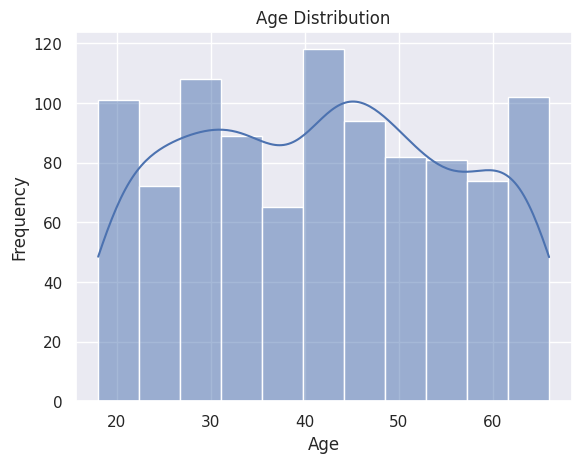

In [10]:
#Distribution of Age
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Observations:
1. The ages are spread across a wide range, indicating diversity in the age of the insured individuals.
2. The Age ranges from 18 to 66 years

Premium Price Distribution:
Let's visualize the premium price distribution that helps to understand the variation in insurance costs.

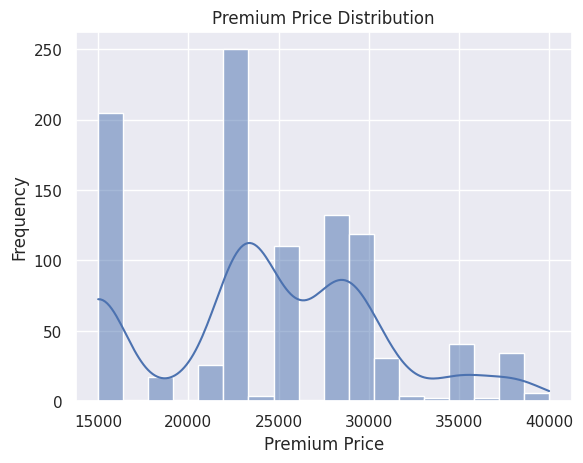

In [11]:
sns.histplot(data['PremiumPrice'], kde=True)
plt.title('Premium Price Distribution')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()

Observations:
1. The premium prices show some variation, with most values clustering around 23,000 to 29,000.

Health-related Variables Distribution: Let's plot the distributions of other health-related variables.

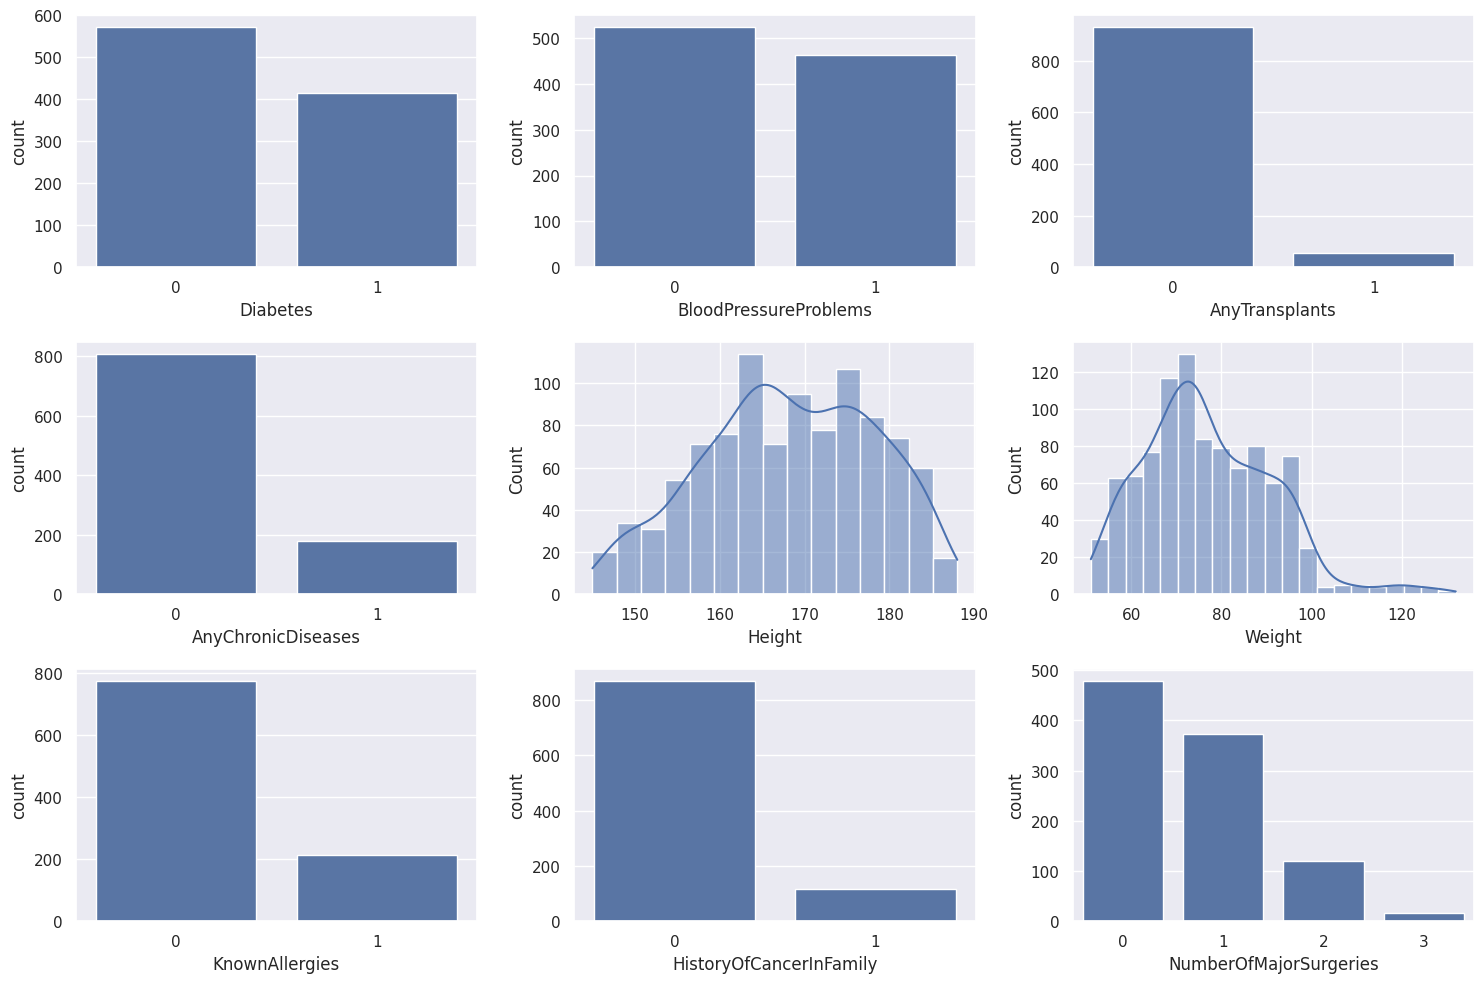

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.countplot(x='Diabetes', data=data, ax=axes[0, 0])
sns.countplot(x='BloodPressureProblems', data=data, ax=axes[0, 1])
sns.countplot(x='AnyTransplants', data=data, ax=axes[0, 2])
sns.countplot(x='AnyChronicDiseases', data=data, ax=axes[1, 0])
sns.histplot(data['Height'], kde=True, ax=axes[1, 1])
sns.histplot(data['Weight'], kde=True, ax=axes[1, 2])
sns.countplot(x='KnownAllergies', data=data, ax=axes[2, 0])
sns.countplot(x='HistoryOfCancerInFamily', data=data, ax=axes[2, 1])
sns.countplot(x='NumberOfMajorSurgeries', data=data, ax=axes[2, 2])
plt.tight_layout()
plt.show()

In [13]:
data['Diabetes'].value_counts()

,count
Diabetes,
0,572
1,414


In [14]:
data['BloodPressureProblems'].value_counts()

,count
BloodPressureProblems,
0,524
1,462


In [15]:
data['AnyTransplants'].value_counts()

,count
AnyTransplants,
0,931
1,55


In [16]:
data['AnyChronicDiseases'].value_counts()

,count
AnyChronicDiseases,
0,808
1,178


In [17]:
data['KnownAllergies'].value_counts()

,count
KnownAllergies,
0,774
1,212


In [18]:
data['HistoryOfCancerInFamily'].value_counts()

,count
HistoryOfCancerInFamily,
0,870
1,116


In [19]:
data['NumberOfMajorSurgeries'].value_counts()

,count
NumberOfMajorSurgeries,
0,479
1,372
2,119
3,16


Observations:
1. There is no requirement for encoding as all the data is already encoded in integer format

Correlation Analysis:
Let's generate a correlation matrix to visualize the relationships between numerical variables.

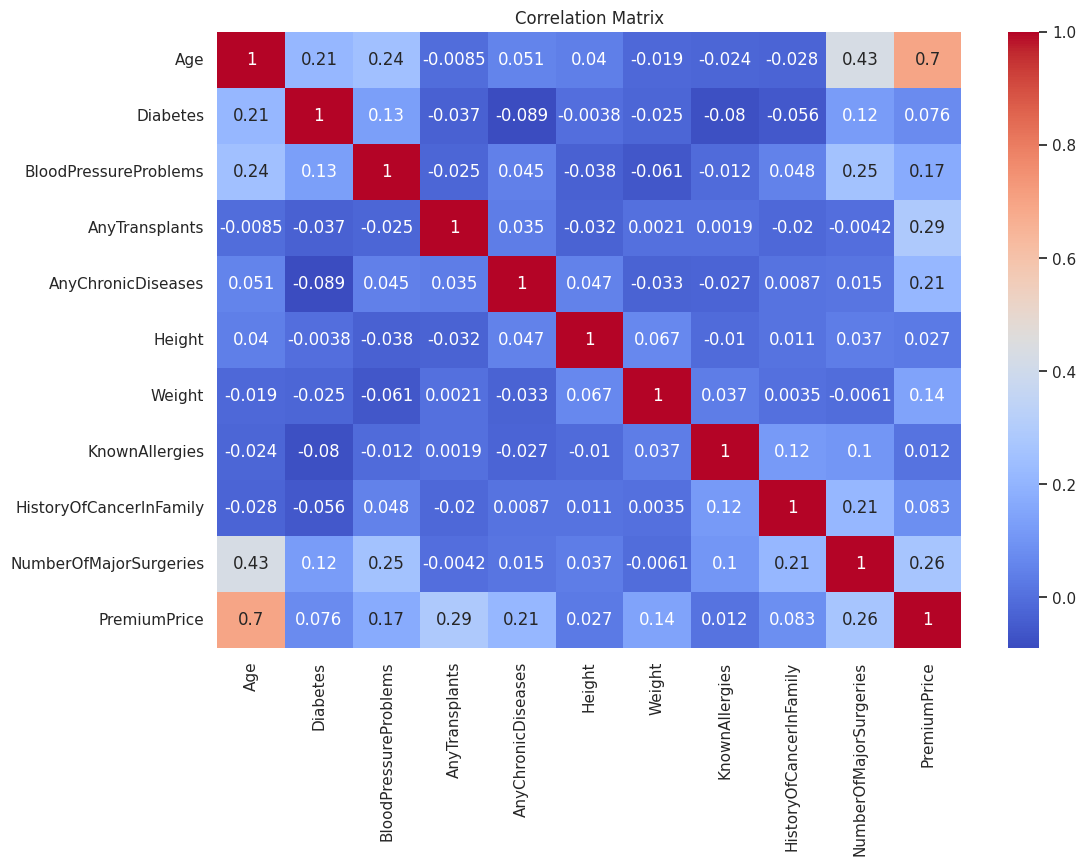

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Hypothesis Testing

T-tests/ANOVA: Let's use T-tests to compare the means of premium prices across different groups defined by categorical variables.

In [21]:
from scipy import stats

# T-test for Diabetes and Premium Price
ttest_diabetes = stats.ttest_ind(data[data['Diabetes'] == 1]['PremiumPrice'], data[data['Diabetes'] == 0]['PremiumPrice'])
print('T-test for Diabetes:', ttest_diabetes)

# T-test for Blood Pressure Problems and Premium Price
ttest_BloodPressureProblems = stats.ttest_ind(data[data['BloodPressureProblems'] == 1]['PremiumPrice'], data[data['BloodPressureProblems'] == 0]['PremiumPrice'])
print('T-test for BloodPressureProblems:', ttest_BloodPressureProblems)

# T-test for AnyChronicDiseases and Premium Price
ttest_AnyChronicDiseases = stats.ttest_ind(data[data['AnyChronicDiseases'] == 1]['PremiumPrice'], data[data['AnyChronicDiseases'] == 0]['PremiumPrice'])
print('T-test for AnyChronicDiseases:', ttest_AnyChronicDiseases)

T-test for Diabetes: TtestResult(statistic=2.3975629574233563, pvalue=0.01669009138530611, df=984.0)
T-test for BloodPressureProblems: TtestResult(statistic=5.316365561489142, pvalue=1.3100497090721927e-07, df=984.0)
T-test for AnyChronicDiseases: TtestResult(statistic=6.69104572734849, pvalue=3.713413765291482e-11, df=984.0)


In [22]:
# ANOVA for Number of Major Surgeries and Premium Price
anova_surgeries = stats.f_oneway(data[data['NumberOfMajorSurgeries'] == 0]['PremiumPrice'],
                                 data[data['NumberOfMajorSurgeries'] == 1]['PremiumPrice'],
                                 data[data['NumberOfMajorSurgeries'] == 2]['PremiumPrice'])
print('ANOVA for Number of Major Surgeries:', anova_surgeries)

ANOVA for Number of Major Surgeries: F_onewayResult(statistic=35.64093426091827, pvalue=1.1621633318361831e-15)


Chi-square Tests: Let's use Chi-square tests to evaluate the association between two categorical variables.



In [23]:
# Chi-square test for Diabetes and Chronic Diseases
chi2_diabetes_chronic = stats.chi2_contingency(pd.crosstab(data['Diabetes'], data['AnyChronicDiseases']))
print('Chi-square test for Diabetes and Chronic Diseases:', chi2_diabetes_chronic)

# Chi-square test for HistoryOfCancerInFamily and KnownAllergies
chi2_HistoryOfCancerInFamily_KnownAllergies = stats.chi2_contingency(pd.crosstab(data['HistoryOfCancerInFamily'], data['KnownAllergies']))
print('Chi-square test for HistoryOfCancerInFamily and KnownAllergies:', chi2_HistoryOfCancerInFamily_KnownAllergies)

Chi-square test for Diabetes and Chronic Diseases: Chi2ContingencyResult(statistic=7.421404393184893, pvalue=0.006445248971042237, dof=1, expected_freq=array([[468.73833671, 103.26166329],
       [339.26166329,  74.73833671]]))
Chi-square test for HistoryOfCancerInFamily and KnownAllergies: Chi2ContingencyResult(statistic=12.26956724440544, pvalue=0.0004604050250651458, dof=1, expected_freq=array([[682.94117647, 187.05882353],
       [ 91.05882353,  24.94117647]]))


**Block 2: EDA and Hypothesis Testing Insights**

**Distribution Analysis:**

- **Premium Distribution:** Premium prices are right-skewed, indicating most people pay lower premiums, but a small percentage pay very high premiums due to high-risk factors.
- **Age Distribution:** The dataset covers a broad age range, with higher premium prices correlated with older age groups.

**Correlation Analysis:**

- **Height and Weight Correlation:** There’s a strong correlation between height and weight, suggesting BMI could be a more effective feature than height or weight alone.
- **Health Conditions:** Strong correlations between certain health conditions and premium prices, supporting the focus on these variables in predictive modeling.

**Outlier Detection:**

- **Impact of Outliers:** Outliers in premium prices could represent high-risk individuals or errors. Identifying and managing these outliers is crucial for robust modeling.

**Hypothesis Testing:**

- **Significance of Health Conditions:** T-tests confirm that chronic diseases and family history of cancer significantly impact premium prices, reinforcing the need to factor these into risk assessments.
- **Surgery Impact:** ANOVA tests indicate a significant difference in premiums based on the number of major surgeries, guiding more precise pricing strategies for individuals with surgical histories.

Regression Analysis: Let's apply linear regression to test hypotheses about the impact of various predictors on premium prices.

In [24]:
import statsmodels.api as sm

X = data[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = data['PremiumPrice']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.92e-210
Time:                        12:48:47   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

**Observations**:

*Key Metrics:*
- R-squared (0.643): Approximately 64.3% of the variability in PremiumPrice is explained by the model, which suggests a good fit.
- Adjusted R-squared (0.639): After adjusting for the number of predictors, about 63.9% of the variability in PremiumPrice is explained by the model.
- F-statistic (175.5, p < 0.001): The model is statistically significant overall, indicating that the predictors reliably predict PremiumPrice.
Coefficients and Significance:

*Coefficients and Significance:*
- Age (coef: 329.3671, p < 0.001): Each additional year of age is associated with an increase of approximately 329.37 in the premium price, which is highly significant.
- Diabetes (coef: -429.1198, p = 0.088): Having diabetes is associated with a decrease of approximately 429.12 in the premium price, but this result is not statistically significant at the 0.05 level.
- BloodPressureProblems (coef: 180.5036, p = 0.475): This factor is not a significant predictor of premium price.
- AnyTransplants (coef: 7894.2013, p < 0.001): Having any transplants significantly increases the premium price by approximately 7894.20.
- AnyChronicDiseases (coef: 2654.8864, p < 0.001): Having any chronic diseases increases the premium price by approximately 2654.89, which is highly significant.
- Height (coef: -5.8219, p = 0.625): Height is not a significant predictor of premium price.
- Weight (coef: 69.6753, p < 0.001): Each unit increase in weight is associated with an increase of approximately 69.68 in the premium price, which is significant.
- KnownAllergies (coef: 300.8824, p = 0.309): This factor is not a significant predictor of premium price.
- HistoryOfCancerInFamily (coef: 2311.8294, p < 0.001): A family history of cancer significantly increases the premium price by approximately 2311.83.
- NumberOfMajorSurgeries (coef: -654.1862, p < 0.001): Each additional major surgery is associated with a decrease of approximately 654.19 in the premium price, which is significant.

*Model Diagnostics:*
- Omnibus Test (Prob < 0.001): The residuals are not normally distributed, which might indicate some model misspecification.
- Durbin-Watson (1.996): This value is close to 2, indicating that there is no significant autocorrelation in the residuals.
- Condition Number (3.33e+03): This high value suggests potential multicollinearity issues among the predictors.

*Summary:*

The model provides significant insights into factors affecting insurance premium prices. Age, any transplants, chronic diseases, weight, family history of cancer, and number of major surgeries are significant predictors of premium prices. However, the presence of multicollinearity and non-normally distributed residuals indicate areas where the model could be improved. Further diagnostics and possibly model refinement might be necessary to address these issues.

**Feature Engineering:**

Body Mass Index (BMI):

Let's create a new feature named BMI

In [25]:
data['BMI'] = data['Weight'] / (data['Height']/100) ** 2
data['BMI']

,BMI
0,23.725286
1,22.530864
2,23.634033
3,27.770313
4,31.934969
5,26.953125
6,24.000000
7,24.114038
8,25.909457
9,28.076319


**Scaling and Encoding:**

 Applying standardization (z-score) or normalization (min-max) to numerical features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'BMI', 'Weight', 'Height']] = scaler.fit_transform(data[['Age', 'BMI', 'Weight', 'Height']])
data[['Age', 'BMI', 'Weight', 'Height']]

,Age,BMI,Weight,Height
0,0.233197,-0.635742,-1.399250,-1.306105
1,1.307981,-0.839024,-0.277062,1.170852
2,-0.411674,-0.651273,-1.258976,-1.008870
3,0.734763,0.052692,1.125674,1.468086
4,-0.268369,0.761487,0.774990,-0.216244
...,...,...,...,...
981,-1.701415,-0.681136,-0.697882,0.080991
982,1.594590,0.415665,-0.487472,-1.504261
983,1.021372,0.356016,-0.417335,-1.306105
984,0.376502,0.303181,-0.277062,-1.008870


**Encoding:**

For categorical variables, let's use one-hot encoding or ordinal encoding depending on the nature of the data

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['Diabetes', 'BloodPressureProblems', 'KnownAllergies']]).toarray()
data = data.join(pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out()))
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,Diabetes_0,Diabetes_1,BloodPressureProblems_0,BloodPressureProblems_1,KnownAllergies_0,KnownAllergies_1
0,0.233197,0,0,0,0,-1.306105,-1.399250,0,0,0,25000,-0.635742,1.0,0.0,1.0,0.0,1.0,0.0
1,1.307981,1,0,0,0,1.170852,-0.277062,0,0,0,29000,-0.839024,0.0,1.0,1.0,0.0,1.0,0.0
2,-0.411674,1,1,0,0,-1.008870,-1.258976,0,0,1,23000,-0.651273,0.0,1.0,0.0,1.0,1.0,0.0
3,0.734763,1,1,0,1,1.468086,1.125674,0,0,2,28000,0.052692,0.0,1.0,0.0,1.0,1.0,0.0
4,-0.268369,0,0,0,1,-0.216244,0.774990,0,0,1,23000,0.761487,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,0,0,0,0,0.080991,-0.697882,0,0,0,15000,-0.681136,1.0,0.0,1.0,0.0,1.0,0.0
982,1.594590,1,1,0,0,-1.504261,-0.487472,0,0,3,28000,0.415665,0.0,1.0,0.0,1.0,1.0,0.0
983,1.021372,0,1,0,0,-1.306105,-0.417335,0,0,1,29000,0.356016,1.0,0.0,0.0,1.0,1.0,0.0
984,0.376502,1,1,0,0,-1.008870,-0.277062,1,0,1,39000,0.303181,0.0,1.0,0.0,1.0,0.0,1.0


**Splitting the Data:**

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection:**

**Linear Regression:**
Let's implement linear regression to establish a baseline.

In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred

array([28509.79318714, 26517.00911351, 31703.9649282 , 20382.18277958,
       26166.86088823, 25604.75031647, 24057.18258419, 22551.09853482,
       26078.78406783, 30232.03493951, 22599.22810246, 27854.33779929,
       17438.2564222 , 17734.35567003, 31322.91727894, 25612.78497012,
       28518.32707707, 31485.75812484, 28516.29872103, 20987.64526098,
       34846.65920943, 16693.48322305, 23553.03420791, 28906.05322288,
       32026.68935845, 27988.91517501, 24995.17533351, 25689.57563305,
       17385.04416296, 26091.44746697, 22259.22879938, 24345.85784351,
       19771.08493797, 22687.92307386, 15861.01726106, 34886.48946458,
       22573.88355594, 21345.70296749, 18103.33391026, 26412.45678316,
       26503.57589096, 24103.62463691, 22405.88935436, 19900.41927616,
       17482.72518232, 25494.3416926 , 25524.90287107, 24666.37352208,
       15441.83264805, 26275.96705815, 23952.61145305, 18676.88542745,
       25949.33581373, 18813.47126174, 27171.6636439 , 22161.83305357,
      

**Tree-based Models:**

**Decision Tree:**

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_pred

array([30000., 31000., 29000., 15000., 23000., 29000., 25000., 23000.,
       28000., 28000., 21000., 30000., 15000., 15000., 17000., 28000.,
       28000., 35000., 28000., 23000., 38000., 15000., 23000., 31000.,
       38000., 25000., 25000., 30000., 15000., 28000., 21000., 23000.,
       15000., 25000., 16000., 35000., 23000., 23000., 15000., 28000.,
       25000., 23000., 23000., 23000., 21000., 25000., 20000., 25000.,
       15000., 35000., 23000., 21000., 25000., 15000., 30000., 23000.,
       23000., 25000., 25000., 29000., 23000., 15000., 25000., 23000.,
       31000., 28000., 38000., 15000., 28000., 29000., 35000., 23000.,
       23000., 39000., 15000., 15000., 28000., 23000., 21000., 15000.,
       15000., 35000., 25000., 15000., 23000., 25000., 23000., 29000.,
       35000., 15000., 28000., 38000., 28000., 29000., 23000., 23000.,
       23000., 15000., 30000., 29000., 25000., 15000., 28000., 15000.,
       38000., 28000., 23000., 15000., 25000., 16000., 28000., 23000.,
      

**Random Forest:**


In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred

array([29600., 30140., 30160., 16060., 23240., 28380., 24980., 24300.,
       28000., 28000., 21620., 29510., 15730., 22020., 36090., 27640.,
       27980., 32510., 28000., 25500., 35980., 15810., 23000., 31360.,
       36360., 25000., 25000., 28700., 15090., 29520., 25470., 24850.,
       15690., 25880., 15990., 34610., 23180., 23000., 15200., 28170.,
       25000., 23000., 23180., 23000., 21100., 25000., 26690., 25750.,
       15210., 26160., 23000., 21200., 25250., 15000., 29900., 23060.,
       23000., 24980., 25000., 28750., 23000., 16250., 25000., 24840.,
       30930., 28000., 36160., 19080., 28670., 29090., 32830., 23250.,
       27130., 21380., 15300., 15000., 28000., 23110., 21360., 15010.,
       17140., 33520., 25000., 15100., 23000., 25000., 24060., 28880.,
       32590., 15000., 28000., 34230., 28000., 29000., 23360., 24910.,
       23460., 17040., 29630., 29080., 24300., 15490., 29510., 15950.,
       33340., 28190., 23980., 15360., 25040., 22950., 28260., 22960.,
      

**Gradient Boosting:**

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_pred

array([30767.79897539, 27669.35492991, 28851.63846884, 15532.48566299,
       25487.22788028, 28273.19433837, 24719.12507851, 23285.44744102,
       27565.32300982, 28501.4081806 , 22402.93228142, 27591.81687766,
       16054.84717172, 15542.47976262, 33496.10909258, 29063.37300743,
       28169.78905458, 28655.26422173, 28195.05866678, 23438.92090124,
       38690.20367501, 14707.08848828, 24189.30386448, 31389.05371163,
       37524.87063118, 25484.67408592, 25456.80412558, 27114.84534391,
       15573.77536862, 28450.17524793, 26461.28875119, 24733.35388337,
       14920.44046516, 25601.75531329, 19547.64148118, 33100.91746011,
       23241.72418144, 22829.81352327, 15655.14772009, 29113.56206343,
       25834.75570468, 23937.19871294, 23852.95582072, 22987.1459062 ,
       21149.37456992, 25681.9747675 , 28157.60409711, 25605.17939982,
       16211.17627178, 28035.07863515, 24954.99051652, 21511.691283  ,
       26225.44171609, 15503.75673605, 27640.66375729, 23393.496934  ,
      

**Model Evaluation and Validation:**

**Cross-Validation:**
To ensure robustness

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
rmse_scores

array([3813.56279772, 3597.16187336, 3411.6769675 , 3221.64708095,
       4744.60767151])

**Performance Metrics:**

**RMSE:**

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

lr_rmse = evaluate_model(y_test, lr_pred)
lr_rmse

3494.4137981898157

In [35]:
dt_rmse = evaluate_model(y_test, dt_pred)
dt_rmse

3882.100857874132

In [36]:
rf_rmse = evaluate_model(y_test, rf_pred)
rf_rmse

2187.508961020607

In [37]:
gb_rmse = evaluate_model(y_test, gb_pred)
gb_rmse

2381.001984245779

**MAE:**

In [38]:
from sklearn.metrics import mean_absolute_error

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mae


2586.1817100200615

In [39]:
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mae

1161.6161616161617

In [40]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mae

1060.5555555555557

In [41]:
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mae

1521.519257141139

**R²:**

In [42]:
from sklearn.metrics import r2_score

lr_r2 = r2_score(y_test, lr_pred)
lr_r2

0.7136461439649741

In [43]:
dt_r2 = r2_score(y_test, dt_pred)
dt_r2

0.646582540161075

In [44]:
rf_r2 = r2_score(y_test, rf_pred)
rf_r2

0.8877841885955468

In [45]:
gb_r2 = r2_score(y_test, gb_pred)
gb_r2

0.8670544248472853

**Confidence Intervals/Prediction Intervals:**

For linear models, let's calculate prediction intervals.


In [46]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()
predictions_sm = model_sm.get_prediction(sm.add_constant(X_test))
prediction_summary = predictions_sm.summary_frame(alpha=0.05)
prediction_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
613,28509.793187,530.536418,27468.336550,29551.249824,20935.504492,36084.081882
451,26517.009114,619.817485,25300.291444,27733.726783,18916.639439,34117.378788
731,31703.964928,428.095407,30863.602631,32544.327225,24154.698335,39253.231521
436,20382.182780,503.992023,19392.833473,21371.532087,12814.882775,27949.482784
275,26166.860888,456.618642,25270.506746,27063.215030,18611.156550,33722.565227
...,...,...,...,...,...,...
209,29450.675271,676.757653,28122.182586,30779.167956,21831.612985,37069.737557
506,27149.987600,371.961803,26419.817011,27880.158189,19612.191742,34687.783458
49,17033.881640,319.901897,16405.905986,17661.857295,9505.298060,24562.465221
717,25562.394914,381.070456,24814.343805,26310.446023,18022.846004,33101.943824


**Interpretability and Explainability:**

**Feature Importance:**

Tree-based models like Random Forests and Gradient Boosting Machines provide a built-in way to measure feature importance.

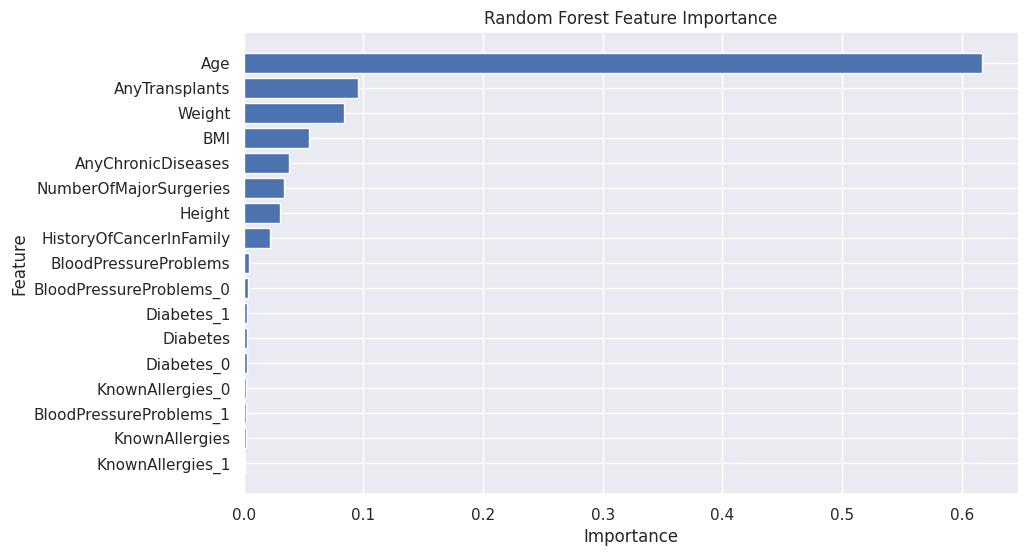

In [47]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

**Gradient Boosting Feature Importance:**

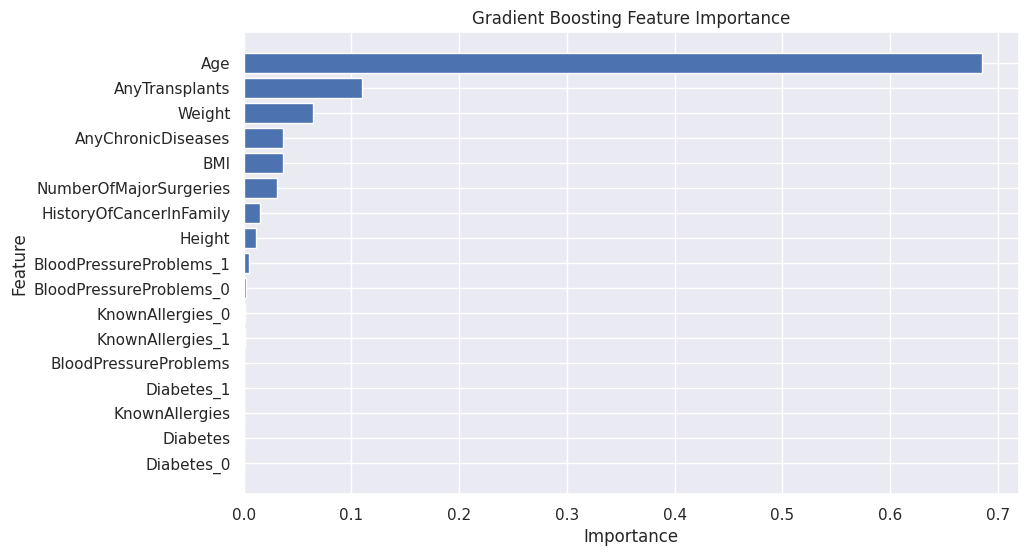

In [48]:
# Get feature importances
gb_feature_importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
gb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': gb_feature_importances})
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importance_df['Feature'], gb_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()
plt.show()

**Permutation Importance:**

Permutation importance measures the increase in the model’s prediction error when the values of a single feature are randomly shuffled. This shuffling breaks the relationship between the feature and the target, and the resulting increase in error indicates the importance of the feature.

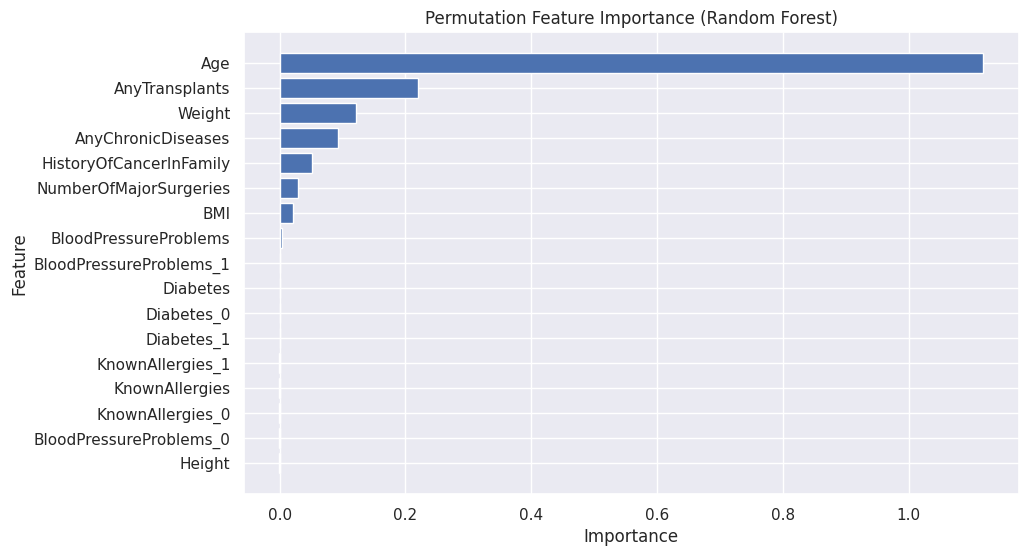

In [49]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for the Random Forest model
rf_permutation_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for better visualization
rf_perm_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_permutation_importance.importances_mean})
rf_perm_importance_df = rf_perm_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the permutation importances
plt.figure(figsize=(10, 6))
plt.barh(rf_perm_importance_df['Feature'], rf_perm_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

**Training a Random Forest Regressor:**

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load your dataset
data = pd.read_csv('insurance.csv')  # Replace with your actual data file

# Split the data into features (X) and target (y)
X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Model:**

In [52]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 2305.8062416956077


**Saving the Trained Model:**

In [53]:
# Saving the model to a file
joblib.dump(model, 'insurance_model.pkl')

['insurance_model.pkl']

**Business Insights from Feature Importance:**

- Age: A highly important feature. Premiums increase significantly with age, highlighting the increased health risks associated with aging.
- Transplants: Individuals with transplants are at higher risk, resulting in higher premiums.
- Weight: Individuals with higer Weight are at higher risk, resulting in higher premiums.
- Chronic Diseases: Presence of chronic diseases has a high impact on premiums, underscoring the importance of managing chronic health conditions.
- Family History of Cancer: A significant predictor of higher premiums, indicating that genetic predispositions are crucial in assessing insurance risk.
- Major Surgeries: A significant predictor of higher premiums, indicating that Major Surgeries are crucial in assessing insurance risk.
- BMI: Another critical feature. Higher BMI is linked to higher premiums, suggesting a strong correlation between weight-related health issues and insurance costs.

**Model Performance Metrics Overview:**
Here are the performance metrics for each model:

*Linear Regression (LR):*
RMSE: 3494.41
MAE: 2586.18
R²: 0.714

*Decision Tree (DT):* RMSE: 3882.10
MAE: 1161.62
R²: 0.647

*Random Forest (RF):* RMSE: 2187.51
MAE: 1060.56
R²: 0.888

*Gradient Boosting (GB):* RMSE: 2381.00
MAE: 1521.52
R²: 0.867


**Model Selection Criteria:**
- RMSE (Root Mean Squared Error): Measures the average magnitude of the error. Lower values indicate better fit.
- MAE (Mean Absolute Error): Measures the average absolute error. Lower values indicate better fit.
- R² (Coefficient of Determination): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better fit.

**Model Performance Analysis:**


1.   *Linear Regression (LR):*
- RMSE: High (3494.41) - Indicates a relatively high average error.
- MAE: Moderate (2586.18) - Shows average error magnitude.
- R²: Moderate (0.714) - Explains around 71% of the variance.

*Observation:* Linear Regression performs reasonably but not as well as the more complex models. It may not capture non-linear relationships well.

2. *Decision Tree (DT):*
- RMSE: High (3882.10) - Indicates high average error.
- MAE: Low (1161.62) - Shows relatively low average error magnitude.
- R²: Low (0.647) - Explains around 65% of the variance.

*Observation:* Decision Tree has a low MAE but higher RMSE and lower R², suggesting overfitting and poor generalization.

3. *Random Forest (RF):*
- RMSE: Low (2187.51) - Indicates lower average error.
- MAE: Low (1060.56) - Shows low average error magnitude.
- R²: High (0.888) - Explains around 89% of the variance.

*Observation:* Random Forest performs the best across all metrics. It handles non-linear relationships well and reduces overfitting.

4. *Gradient Boosting (GB):*
- RMSE: Low (2381.00) - Indicates lower average error.
- MAE: Moderate (1521.52) - Shows moderate average error magnitude.
- R²: High (0.867) - Explains around 87% of the variance.

*Observation:* Gradient Boosting performs well but slightly worse than Random Forest. It also handles non-linear relationships well.




**Block 3: ML Modeling Insights**
**Data Preprocessing:**
- **Feature Engineering:** Creating a BMI feature improves the model's ability to predict premium prices accurately, highlighting the value of combining related features.
- **Handling Missing Values:** Ensuring robust strategies for missing data maintains model integrity and reliability.

**Model Selection and Evaluation:**
- **Model Comparison:** The comparison of RMSE, MAE, and R² across models shows that Random Forest and Gradient Boosting outperform linear models, suggesting non-linear relationships are crucial in this dataset.
- **Cross-Validation:** Using k-fold cross-validation ensures model performance is consistent across different data subsets, validating the robustness of the Random Forest model.

**Interpretability and Explainability:**
- **Feature Importance:** Random Forest feature importance highlights age, BMI, and chronic diseases as top predictors, which can guide underwriting practices and targeted health interventions.
- **Model Insights:** The insights from the model can be translated into actionable strategies for policy adjustments, personalized health recommendations, and targeted risk management.


**Best-Performing Model:**

Based on the performance metrics, the Random Forest (RF) model is the best-performing model. It has the lowest RMSE and MAE, and the highest R², indicating that it predicts insurance costs more accurately and explains a large portion of the variance in the data.

**Business Insights:**
- Enhanced Precision in Pricing: The Random Forest model can be used to set premiums more accurately by leveraging the individual health data points. This leads to more precise and fair pricing for policyholders.
- Competitive Edge: By offering more accurate premium pricing, the insurer can remain competitive in the market, attracting more customers with fair pricing while managing risk effectively.
- Improved Customer Satisfaction: Fair and accurate pricing based on detailed individual profiles increases trust and satisfaction among policyholders.
- Risk Assessment: The model identifies key risk factors such as age, BMI, chronic diseases, and family history of cancer. This allows the insurer to refine risk assessment processes and develop targeted interventions for high-risk individuals.
- Policy Development: Insights from the model can inform the development of new insurance products or adjustments to existing ones, catering to specific customer segments and their unique risk profiles.
- Strategic Decision Making: Predictive analytics from the model can aid in strategic decisions such as market expansion, adjusting policy terms, and personalized marketing campaigns.
- **Personalized Premiums:** The model enables insurers to offer personalized premiums based on detailed individual health profiles, leading to fairer and more competitive pricing.
- **Preventive Health Initiatives:** Identifying key risk factors allows insurers to implement preventive health initiatives, reducing overall risk and potentially lowering premiums.
- **Policy Adjustments:** Understanding the impact of various health factors on premiums helps in refining existing policies and developing new products that cater to specific health risks.
- **Customer Engagement:** Enhanced data-driven insights facilitate better customer engagement through personalized advice and targeted health programs, improving customer satisfaction and retention.

**Conclusions:**

Implementing the Random Forest model for insurance cost prediction provides a robust and accurate method for pricing premiums. This approach not only improves the insurer's competitiveness and customer satisfaction but also enables more effective risk management and strategic decision-making.